In [1]:
using IntrinsicPersistence
using Plots; plotly
using StaticArrays
using LinearAlgebra

┌ Info: Recompiling stale cache file /home/m/.julia/compiled/v1.0/IntrinsicPersistence/w4hTS.ji for IntrinsicPersistence [db27130a-0c5e-11e9-3c49-134729fc6916]
└ @ Base loading.jl:1190


# Plate With Hole

Construct a 4×4 plate with a circluar hole and find the shortest homology basis.

In [2]:
# točke:
pts = [4SVector(rand(), rand()) - 2 for _ in 1:10_000]
filter!(x -> norm(x) > 1, pts)

7998-element Array{SArray{Tuple{2},Float64,1,2},1}:
 [-1.66975, 0.883386]  
 [-1.54152, -0.716989] 
 [1.76134, 1.48252]    
 [0.683597, 1.45277]   
 [1.18527, -0.938944]  
 [-0.594497, -0.868719]
 [-1.06909, 0.169313]  
 [-0.915839, -0.856619]
 [-1.36465, 1.70068]   
 [1.09205, -0.454963]  
 [-1.20927, 1.15718]   
 [-0.059572, 1.13669]  
 [-1.95592, -0.121098] 
 ⋮                     
 [0.0212983, -1.11878] 
 [-0.140499, 1.32585]  
 [0.632723, 1.41668]   
 [-1.67211, 0.939213]  
 [1.8093, -0.446781]   
 [-0.837719, 1.07837]  
 [1.21557, 0.755586]   
 [1.475, -0.854148]    
 [-1.17852, -1.19646]  
 [1.50557, -0.344082]  
 [1.18616, 0.699547]   
 [-1.83037, -0.391644] 

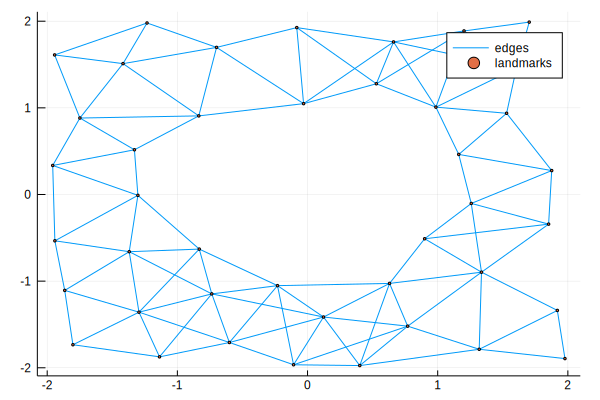

In [3]:
gc = GeodesicComplex(pts, 0.5)
plot(gc)

In [4]:
cycles = persistence(gc)

1-element Array{IntrinsicPersistence.Cycle{Float64,GeodesicComplex{Float64,SArray{Tuple{2},Float64,1,2},Distances.Euclidean,Array{Int64,1},NearestNeighbors.KDTree{SArray{Tuple{2},Float64,1,2},Distances.Euclidean,Float64}}},1}:
 IntrinsicPersistence.Cycle{Float64,GeodesicComplex{Float64,SArray{Tuple{2},Float64,1,2},Distances.Euclidean,Array{Int64,1},NearestNeighbors.KDTree{SArray{Tuple{2},Float64,1,2},Distances.Euclidean,Float64}}}(GeodesicComplex{Float64, SArray{Tuple{2},Float64,1,2}} with 7998 points, 42 landmarks and 100 edges, [444, 5803, 2393, 7632, 7050, 7449, 6542, 2486, 2660, 5861, 5459, 4685], 6.300315707558579, 2.0380366084095582)

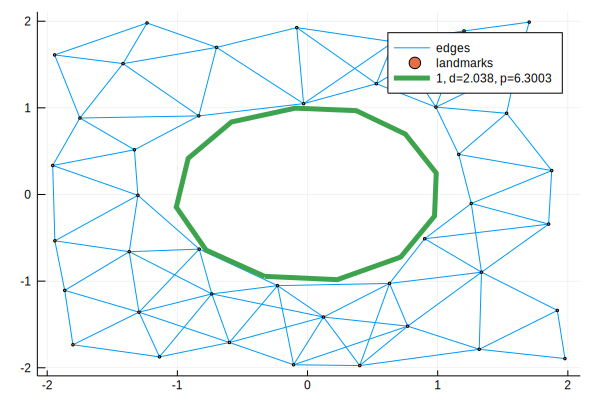

In [5]:
plot(gc, cycles)

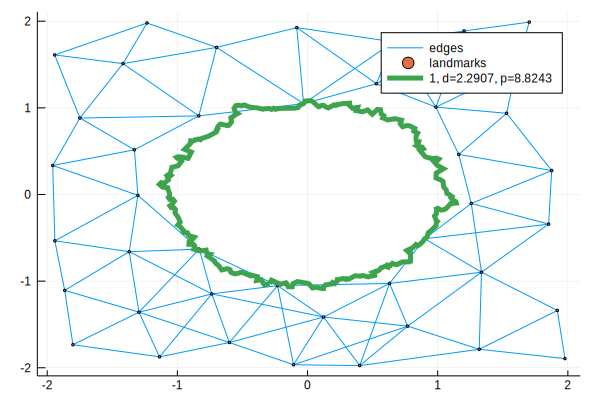

In [6]:
cycles_dense = persistence(gc, dense = true)
plot(gc, cycles_dense)

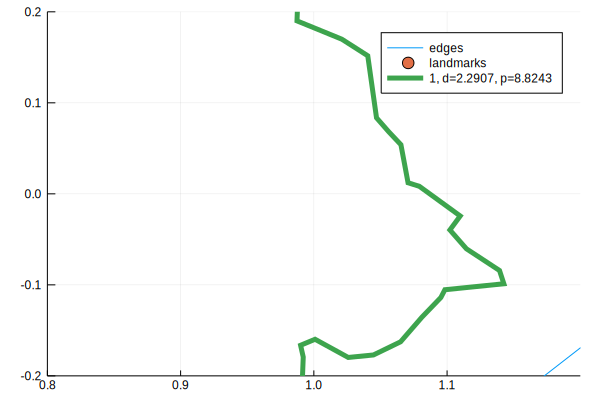

In [8]:
plot(gc, cycles_dense, xlim=(0.8, 1.2), ylim=(-0.2, 0.2))

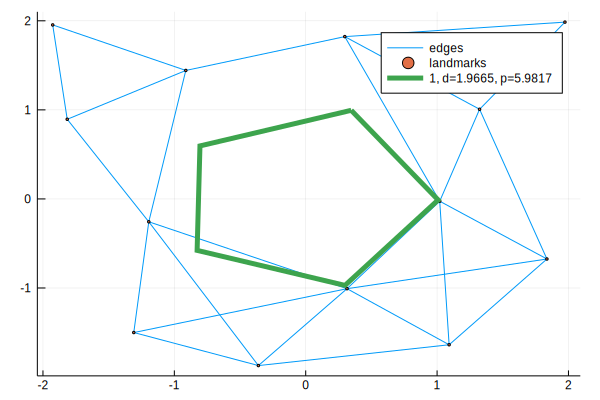

In [9]:
gc2 = GeodesicComplex(pts, 1.0)
cycles2 = persistence(gc2)
plot(gc2, cycles2)

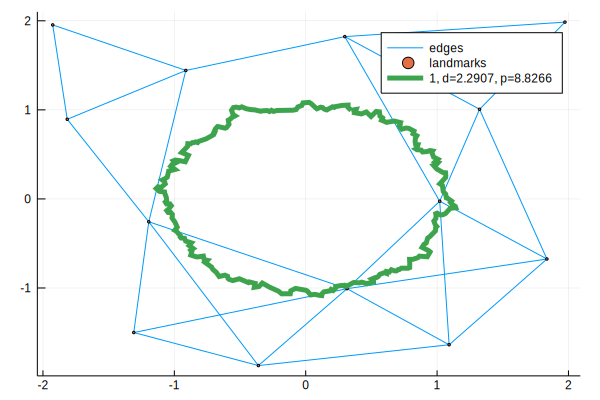

In [10]:
cycles2_dense = persistence(gc2, dense = true)
plot(gc2, cycles2_dense)

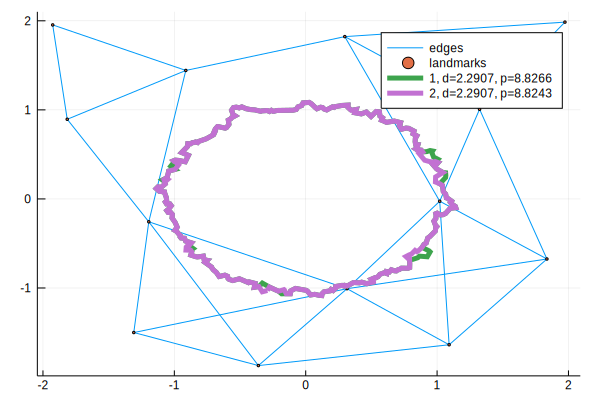

In [17]:
plot(gc2, [cycles_dense[1], cycles2_dense[1]])

In [21]:
pie = perimeter(cycles[1]) / 2

3.1501578537792896

In [22]:
pie - π

0.008565200189496469